# Ensemble Models Part 3  - Boosting 
![ChessUrl](https://media.giphy.com/media/l378octkVFCX8ApaM/giphy.gif)
![ChessUrl](https://media.giphy.com/media/fSYYKe1ETNpMUdjSbv/giphy.gif)

# Ensemble models - Summary 

Ensemble models, combine the predictions of multiple models, to improve the overall performance. 

## Simple ensemble Methods : Voting and averaging

Simple ensemble learning methods use a group of existing models, and combine their predictions by voting or averaging. Advanced ensemble models, create a group of models on the given train data set, then combined their predictions in one of simple ensemble methods.


# Advanced ensemble methods

## Bagging (Bootstrap Aggregating)
Bagging is an ensemble method. Here are a rough scheme:

1. Create random subset samples of the training data.
2. Build a model ,Decision tree for example, and fit it to each sample.
3. Combined multiple results by using simple ensemble methods as voting and avreging.

#### BaggingClassifier - Bagging in scikit-learn

This ensemble method or meta-classifier is implemented in sk-learn by  BaggingClassifier class.
* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 

#### Random forest 

Random forest model, technique actually uses this Begging concept.
But Random forest, add verasity to its models, by choosing a different subset of features to fit to each model, as well to each bootstrapped sample.

## Boosting
Boosting is an **iterative technique**, meaning we promote step by step, hopefully to to a better solution.  In each step, we build a model, that is based on a feedback of the previous model.

Boosting algorithms, show good predictive accuracy, the best from the models we saw so far. But with it comes high variance and the tendency to overfit.

#### AdaBoost

AdaBoost method, fit a sequence of base models on repeatedly modified versions of the data. At each boosting iteration the samples that were misclassified in the previous iteration are given higher weights, while the correctly-classified samples are given lower weights.
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


#### Gradient descent
Gradient descent is a known boosting method, that aims to diminish a given loss function iterativly. In Gradient descent, we step "down" the the loss function in the direction of the derivative. 

#### Gradient Boosting 

Boosting technique, with decision tree as base model, and Gradient decent as boosting method.

Gradient Boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. 

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html


### XGBoost
XGBoost stands for eXtreme Gradient Boosting.
It is improved version of the Gradient Boosting. Few of the improvments are:
* Xgboost does regularization of the tree as well to avoid overfitting.
* Xgboost deals with the missing values efficiently.
* Xgboost uses optimization techniques to yield superior results using less computing resources in the shortest amount of time.

Following link to learn xgboost:
* https://www.youtube.com/watch?v=Vly8xGnNiWs

In [71]:
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, BaggingClassifier, \
    AdaBoostClassifier, GradientBoostingClassifier, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [72]:
def classification_results(y, y_pred, name='', classes=['no', 'yes'], add_rep=False):
    acc = accuracy_score(y, y_pred)
                        
    cm = pd.DataFrame(confusion_matrix(y, y_pred), 
                      index=classes, 
                      columns=classes)

    print(name + ' accuracy: ', round(acc,4))
    print()
    print(cm)
    print()
    if (add_rep):
        print(name + ' Classification report: ')
        print(classification_report(y, y_pred))


In [73]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred, name=''):
    
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print(name )
    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

## Scikit-learn AdaBoost

Scikit-learn AdaBoost class implements the AdaBoost method. The main arguments are:
* base_estimator - the weak learner used.
* n_estimators- the maximum number of iterations
* learning_rate - The 'size' of the correction in each iterative step, or the amount of impact of the former classifiers on the boosting process.


> AdaBoost relatively sensitive to noisy data and outliers,since it tries to improve performance by iteratively clinging to the mis-classified samples.

#### AdaBoost example with digits dataset

In [74]:
from sklearn import datasets

data = datasets.load_digits()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                        random_state=0)

clf_base = DecisionTreeClassifier(max_depth=3)

clf_adaboost = AdaBoostClassifier(base_estimator=clf_base,
                                  n_estimators=200,
                                  learning_rate=0.01)
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.01, n_estimators=200, random_state=None)

In [75]:
classification_results(y_train, clf_adaboost.predict(X_train), name='AdaBoost train', 
                       classes=data.target_names, add_rep=True)

AdaBoost train accuracy:  0.936

     0    1    2    3    4    5    6    7    8    9
0  151    0    0    0    0    0    0    0    0    0
1    0  103    0    1    0    0    0    0   33   10
2    0    0  128    3    0    0    0    0    9    1
3    0    0    0  129    0    1    0    1    4   19
4    0    0    0    0  148    0    3    0    0    0
5    0    0    0    0    0  141    0    0    0    1
6    0    0    0    0    0    0  136    0    1    0
7    0    0    0    0    0    0    0  136    4    0
8    0    0    0    0    0    0    0    0  135    0
9    0    0    0    0    0    0    0    1    0  138

AdaBoost train Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      0.70      0.82       147
           2       1.00      0.91      0.95       141
           3       0.97      0.84      0.90       154
           4       1.00      0.98      0.99       151
           5       0.99      0

In [76]:
classification_results(y_test, clf_adaboost.predict(X_test), name='AdaBoost test', 
                       classes=data.target_names, add_rep=True)

AdaBoost test accuracy:  0.8917

    0   1   2   3   4   5   6   7   8   9
0  25   0   0   1   0   1   0   0   0   0
1   0  25   0   1   0   0   0   0   6   3
2   0   1  25   5   0   0   0   0   5   0
3   0   0   0  26   0   0   0   0   1   2
4   0   1   0   0  29   0   0   0   0   0
5   0   0   0   0   1  36   0   0   0   3
6   0   0   0   1   0   0  42   0   1   0
7   0   0   0   0   0   0   0  38   1   0
8   0   1   0   1   0   0   0   0  37   0
9   0   0   0   2   0   1   0   0   0  38

AdaBoost test Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        27
           1       0.89      0.71      0.79        35
           2       1.00      0.69      0.82        36
           3       0.70      0.90      0.79        29
           4       0.97      0.97      0.97        30
           5       0.95      0.90      0.92        40
           6       1.00      0.95      0.98        44
           7       1.00      0.97

In [77]:
clf_base = LogisticRegression()

clf_adaboost = AdaBoostClassifier(base_estimator=clf_base,
                                  n_estimators=200,
                                  learning_rate=0.01)
clf_adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          learning_rate=0.01, n_estimators=200, random_state=None)

In [78]:
classification_results(y_train, clf_adaboost.predict(X_train), name='AdaBoost train', 
                       classes=data.target_names)

AdaBoost train accuracy:  0.9763

     0    1    2    3    4    5    6    7    8    9
0  151    0    0    0    0    0    0    0    0    0
1    0  139    1    0    1    0    0    0    4    2
2    0    1  140    0    0    0    0    0    0    0
3    0    0    0  151    0    0    0    0    2    1
4    0    1    0    0  147    0    0    0    3    0
5    0    0    0    0    0  138    1    0    0    3
6    0    2    0    0    1    0  133    0    1    0
7    0    0    0    0    0    0    0  138    1    1
8    0    3    0    0    0    0    0    0  132    0
9    0    0    0    1    0    1    0    0    3  134



In [79]:
classification_results(y_test, clf_adaboost.predict(X_test), name='AdaBoost test', 
                       classes=data.target_names)

AdaBoost test accuracy:  0.9611

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  31   0   0   0   0   1   0   1   2
2   0   0  34   0   0   0   0   1   1   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   0   0   0   0  39   0   0   0   1
6   0   1   0   0   0   0  43   0   0   0
7   0   0   0   0   2   0   0  37   0   0
8   0   1   1   0   0   0   0   0  37   0
9   0   0   0   0   0   1   0   0   0  40



### AdaBoost regression example with Boston data
In the following example, we compare Decision tree regressor to AdaBoost regressor that is based on this decision tree.

In [80]:
data = datasets.load_boston()


In [81]:
df = pd.DataFrame(data=data['data'], columns = data.feature_names)
df['target']=data['target']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [82]:
df_train, df_test = train_test_split(df, test_size=0.2,random_state=0)
X_train = df_train.drop(['target'], axis=1)
y_train=df_train['target']
df_test=df_test.sort_values('target').reset_index(drop=True)
X_test = df_test.drop(['target'], axis=1)
y_test=df_test['target']

In [83]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [84]:
base_dt = DecisionTreeRegressor(max_depth=3)
base_dt.fit(X_train, y_train)
regression_results(y_train, base_dt.predict(X_train),'Decision Tree train')
print()
regression_results(y_test, base_dt.predict(X_test),'Decision Tree test')

Decision Tree train
explained_variance:  0.8291
r2:  0.8291
MAE:  2.739
MSE:  14.5504
RMSE:  3.8145

Decision Tree test
explained_variance:  0.5937
r2:  0.5897
MAE:  3.5791
MSE:  33.4113
RMSE:  5.7802


In [85]:
base_dt = DecisionTreeRegressor(max_depth=3)

adaboost = AdaBoostRegressor(base_estimator=base_dt,
                                  n_estimators=200,
                                  learning_rate=0.01)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.01, loss='linear', n_estimators=200,
         random_state=None)

In [86]:
regression_results(y_train, adaboost.predict(X_train),'AdaBoost with Decision Tree train')

AdaBoost with Decision Tree train
explained_variance:  0.9024
r2:  0.9023
MAE:  2.2422
MSE:  8.3154
RMSE:  2.8836


In [87]:
regression_results(y_test, adaboost.predict(X_test),'AdaBoost with Decision Tree test')

AdaBoost with Decision Tree test
explained_variance:  0.6676
r2:  0.6674
MAE:  3.2243
MSE:  27.0818
RMSE:  5.204


#### AdaBoost regressor with Linear regression as base model

In [88]:
from sklearn.linear_model import LinearRegression
base_lr = LinearRegression()
base_lr.fit(X_train, y_train)
regression_results(y_train, base_lr.predict(X_train),'LinearRegression train')
print()
regression_results(y_test, base_lr.predict(X_test),'LinearRegression test')

LinearRegression train
explained_variance:  0.773
r2:  0.773
MAE:  3.1032
MSE:  19.3265
RMSE:  4.3962

LinearRegression test
explained_variance:  0.5901
r2:  0.5892
MAE:  3.8429
MSE:  33.449
RMSE:  5.7835


In [89]:
adaboost = AdaBoostRegressor(base_estimator=base_lr,
                                  n_estimators=200,
                                  learning_rate=0.01)
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         learning_rate=0.01, loss='linear', n_estimators=200,
         random_state=None)

In [90]:
regression_results(y_train, adaboost.predict(X_train),'AdaBoostRegressor train')

AdaBoostRegressor train
explained_variance:  0.7696
r2:  0.7681
MAE:  3.2928
MSE:  19.7454
RMSE:  4.4436


In [91]:
regression_results(y_test, adaboost.predict(X_test),'AdaBoostRegressor test')

AdaBoostRegressor test
explained_variance:  0.6089
r2:  0.6083
MAE:  4.0102
MSE:  31.8976
RMSE:  5.6478


### View AdaBoost best estimator and Compare to Base estimator
##### Extract The collection of fitted sub-estimators

In [92]:
sub_estimators= adaboost.estimators_ 
len(sub_estimators)

200

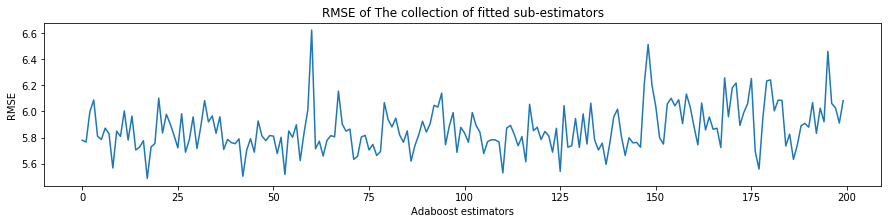

In [93]:
plt.figure(figsize=(15,3))
test_rmse=np.zeros((200))
for i,e in enumerate(sub_estimators):
    test_rmse[i]=np.sqrt(metrics.mean_squared_error(y_test, e.predict(X_test)))
plt.xlabel('Adaboost estimators')
plt.ylabel('RMSE')
plt.plot(test_rmse);
plt.title('RMSE of The collection of fitted sub-estimators');

##### Get the best estimator of the collection of fitted sub-estimators

In [94]:
min_rmse_estimator = np.argmin(test_rmse)
min_rmse_estimator, np.sqrt(metrics.mean_squared_error(y_test, 
                                                       sub_estimators[min_rmse_estimator].predict(X_test)))

(17, 5.486652714317901)

In [95]:
min_lr_estimator = sub_estimators[min_rmse_estimator]
min_lr_estimator.coef_ , min_lr_estimator.intercept_ 

(array([-9.60139617e-02,  3.88375751e-02,  2.57001395e-02,  5.08985356e+00,
        -2.04159758e+01,  3.57239412e+00,  1.20029995e-02, -1.45347278e+00,
         3.60998677e-01, -1.34394900e-02, -8.14371468e-01,  6.03394495e-03,
        -6.93855112e-01]), 39.52103025628822)

In [96]:
base_lr.coef_ , base_lr.intercept_ 

(array([-1.19443447e-01,  4.47799511e-02,  5.48526168e-03,  2.34080361e+00,
        -1.61236043e+01,  3.70870901e+00, -3.12108178e-03, -1.38639737e+00,
         2.44178327e-01, -1.09896366e-02, -1.04592119e+00,  8.11010693e-03,
        -4.92792725e-01]), 38.09169492630278)

In [97]:
df_test['pred_base']=base_lr.predict(X_test)
df_test['pred_best_ada']=min_lr_estimator.predict(X_test)
df_train['pred_base']=base_lr.predict(X_train)
df_train['pred_best_ada']=min_lr_estimator.predict(X_train)

In [98]:
regression_results(y_test, base_lr.predict(X_test),'Base Linear regression on test data:')

Base Linear regression on test data:
explained_variance:  0.5901
r2:  0.5892
MAE:  3.8429
MSE:  33.449
RMSE:  5.7835


In [99]:
regression_results(y_test, min_lr_estimator.predict(X_test),'Best Linear regression on test data:')

Best Linear regression on test data:
explained_variance:  0.6318
r2:  0.6303
MAE:  3.9724
MSE:  30.1034
RMSE:  5.4867


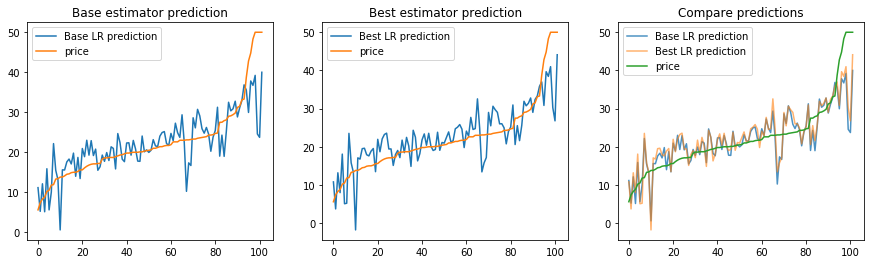

In [101]:
plt.figure(figsize=(15,4))

plt.subplot(1, 3, 1)

df_test.pred_base.plot()
df_test.target.plot()
plt.legend(['Base LR prediction', 'price']);
plt.title('Base estimator prediction');

plt.subplot(1, 3, 2)
df_test.pred_best_ada.plot()
df_test.target.plot()
plt.legend(['Best LR prediction', 'price']);

plt.title('Best estimator prediction');

plt.subplot(1, 3, 3)
df_test.pred_base.plot(alpha=0.8)
df_test.pred_best_ada.plot(alpha=0.6)
df_test.target.plot()
plt.title('Compare predictions');
plt.legend(['Base LR prediction', 'Best LR prediction', 'price']);

## Scikit-learn Gradient boosting - Minimizing  loss function
the _GradientBoostingClassifier_ classifier works only with decision trees. so the model hyperparameters are given directly to the _GradientBoostingClassifier_.

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html
* http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html 




> **NOTE:** The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and max_features=n_features, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed.

### Lets run boston regression with Gradient boosting

In [31]:
clf_GB = GradientBoostingRegressor(max_depth=3,
                                    n_estimators=200,
                                    learning_rate=0.01, verbose=1)
clf_GB.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1          83.7389            0.20s
         2          82.3620            0.25s
         3          81.0126            0.26s
         4          79.6898            0.24s
         5          78.3931            0.23s
         6          77.1220            0.21s
         7          75.8760            0.22s
         8          74.6545            0.21s
         9          73.4572            0.21s
        10          72.2833            0.21s
        20          61.5180            0.15s
        30          52.5704            0.13s
        40          45.1687            0.12s
        50          38.9493            0.11s
        60          33.7540            0.10s
        70          29.3597            0.10s
        80          25.6254            0.09s
        90          22.4616            0.08s
       100          19.8130            0.07s
       200           7.6619            0.00s


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False)

In [32]:
regression_results(y_train, clf_GB.predict(X_train),'GradientBoostingRegressor train')
print()
regression_results(y_test, clf_GB.predict(X_test),'GradientBoostingRegressor test')

GradientBoostingRegressor train
explained_variance:  0.91
r2:  0.91
MAE:  2.1631
MSE:  7.6619
RMSE:  2.768

GradientBoostingRegressor test
explained_variance:  0.748
r2:  0.748
MAE:  3.133
MSE:  20.5193
RMSE:  4.5298


### Classification example with Gradient boosting

In [33]:
data = datasets.load_digits()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                        random_state=0)


In [34]:
clf_GB = GradientBoostingClassifier(max_depth=3,
                                    n_estimators=200,
                                    learning_rate=0.01, verbose=1)
clf_GB.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1        3215.6313           10.27s
         2        3129.8617            9.82s
         3        3050.1777            9.35s
         4        2975.8496            8.87s
         5        2906.0649            8.94s
         6        2840.5348            8.77s
         7        2778.5467            8.93s
         8        2719.7466            8.73s
         9        2663.9756            8.54s
        10        2610.4905            8.43s
        20        2178.1802            7.65s
        30        1861.2350            7.23s
        40        1613.7877            6.70s
        50        1415.8463            6.22s
        60        1249.0973            5.82s
        70        1107.8564            5.40s
        80         987.0129            5.00s
        90         882.8483            4.57s
       100         791.2592            4.16s
       200         283.9247            0.00s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [35]:
classification_results(y_train, clf_GB.predict(X_train), name='GradientBoostingClassifier train', 
                       classes=data.target_names)

GradientBoostingClassifier train accuracy:  0.9861

     0    1    2    3    4    5    6    7    8    9
0  151    0    0    0    0    0    0    0    0    0
1    0  146    0    1    0    0    0    0    0    0
2    0    0  141    0    0    0    0    0    0    0
3    0    1    0  149    0    2    0    1    1    0
4    0    0    0    0  149    0    0    1    1    0
5    0    0    0    0    0  141    0    0    0    1
6    0    0    0    0    0    0  136    0    1    0
7    0    0    0    1    0    0    0  137    0    2
8    0    2    0    0    0    0    0    0  132    1
9    0    0    0    1    0    0    0    1    2  135



In [36]:
classification_results(y_test, clf_GB.predict(X_test), name='GradientBoostingClassifier test', 
                       classes=data.target_names)

GradientBoostingClassifier test accuracy:  0.9333

    0   1   2   3   4   5   6   7   8   9
0  26   0   0   0   0   1   0   0   0   0
1   0  32   0   1   0   0   0   0   0   2
2   1   0  32   1   0   0   1   1   0   0
3   0   0   0  28   0   0   0   0   0   1
4   1   0   0   0  28   0   0   1   0   0
5   0   1   0   0   0  38   0   0   0   1
6   0   0   0   1   1   0  42   0   0   0
7   0   0   0   0   1   0   0  38   0   0
8   0   2   0   2   0   0   0   0  35   0
9   1   0   0   1   0   1   0   0   1  37



## Learning Rate is importent

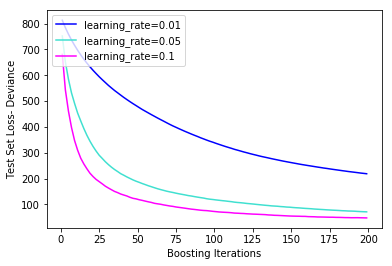

In [37]:
original_params = {'n_estimators': 200, 'max_leaf_nodes': 3, 
                   'max_depth': 4, 'random_state': 2,
                   'min_samples_split': 5}

plt.figure()
lr=0.01

for label, color, setting in [('learning_rate=0.01',
                               'blue',
                               {'learning_rate': 0.01}),
                              ('learning_rate=0.05', 
                               'turquoise',
                               {'learning_rate': 0.05}), 
                              ('learning_rate=0.1',
                               'magenta',
                               {'learning_rate': 0.1})]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::2], 
             test_deviance[::2],
            '-', color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Loss- Deviance')

plt.show()

In [38]:
clf_GB = GradientBoostingClassifier(max_depth=4,
                                    n_estimators=200,
                                    learning_rate=0.1, 
                                    subsample=0.5,verbose=1)
clf_GB.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1        1139.7746         417.7321           12.73s
         2         930.3062         206.0117           11.93s
         3         766.6696         138.9439           11.27s
         4         660.8273         104.8762           11.47s
         5         562.5811          86.0373           11.55s
         6         496.5491          73.0501           11.31s
         7         417.7942          57.3630           10.98s
         8         363.1556          43.9408           10.79s
         9         314.5323          41.6581           10.74s
        10         278.9602          32.0214           10.57s
        20          85.9528           6.9753            9.45s
        30          35.4063           1.5429            8.85s
        40          14.8247           0.6279            8.16s
        50           6.9913           0.1675            7.58s
        60           3.7519           0.0456            7.01s
       

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=0.5, tol=0.0001, validation_fraction=0.1,
              verbose=1, warm_start=False)

In [39]:
classification_results(y_train, clf_GB.predict(X_train), name='GradientBoostingClassifier train', 
                       classes=data.target_names)
classification_results(y_test, clf_GB.predict(X_test), name='GradientBoostingClassifier test', 
                       classes=data.target_names)

GradientBoostingClassifier train accuracy:  1.0

     0    1    2    3    4    5    6    7    8    9
0  151    0    0    0    0    0    0    0    0    0
1    0  147    0    0    0    0    0    0    0    0
2    0    0  141    0    0    0    0    0    0    0
3    0    0    0  154    0    0    0    0    0    0
4    0    0    0    0  151    0    0    0    0    0
5    0    0    0    0    0  142    0    0    0    0
6    0    0    0    0    0    0  137    0    0    0
7    0    0    0    0    0    0    0  140    0    0
8    0    0    0    0    0    0    0    0  135    0
9    0    0    0    0    0    0    0    0    0  139

GradientBoostingClassifier test accuracy:  0.9667

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  34   0   0   1   0   0   0   0   0
2   1   0  35   0   0   0   0   0   0   0
3   0   0   1  28   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   1   0   0   0  38   0   0   0   1
6   0   1   0   0   0   0  42   0

# XGBoost
to install on windows: 
`conda install -c anaconda py-xgboost ` 

Example's of regression and classification:
* https://www.kaggle.com/stuarthallows/using-xgboost-with-scikit-learn

In [40]:
data = datasets.load_digits()
X = data['data']
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,
                                                        random_state=0)


In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

In [42]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(max_depth=4,
                                    n_estimators=200,
                                    learning_rate=0.1, 
                                    subsample=0.5,verbose=1)


xgb_model.fit(X_train, y_train, verbose=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.5, verbose=1)

In [43]:
classification_results(y_train, xgb_model.predict(X_train), name='XGBClassifier train', 
                       classes=data.target_names)
classification_results(y_test, xgb_model.predict(X_test), name='XGBClassifier test', 
                       classes=data.target_names)

XGBClassifier train accuracy:  1.0

     0    1    2    3    4    5    6    7    8    9
0  151    0    0    0    0    0    0    0    0    0
1    0  147    0    0    0    0    0    0    0    0
2    0    0  141    0    0    0    0    0    0    0
3    0    0    0  154    0    0    0    0    0    0
4    0    0    0    0  151    0    0    0    0    0
5    0    0    0    0    0  142    0    0    0    0
6    0    0    0    0    0    0  137    0    0    0
7    0    0    0    0    0    0    0  140    0    0
8    0    0    0    0    0    0    0    0  135    0
9    0    0    0    0    0    0    0    0    0  139

XGBClassifier test accuracy:  0.9667

    0   1   2   3   4   5   6   7   8   9
0  27   0   0   0   0   0   0   0   0   0
1   0  33   0   0   1   0   0   0   0   1
2   1   0  35   0   0   0   0   0   0   0
3   0   0   0  29   0   0   0   0   0   0
4   0   0   0   0  29   0   0   1   0   0
5   0   0   0   0   0  38   0   0   0   2
6   0   1   0   0   0   0  43   0   0   0
7   0   0   0   0